In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"yishengliu","key":"600d4a6327f17945c27ff54c8bae7bad"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=2901e0a9b0ce6385c54bb8d224285c664c72ca7972d3d9616eaf1aafcad73b2e
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [3]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 94% 268M/285M [00:04<00:00, 31.4MB/s]
100% 285M/285M [00:05<00:00, 59.1MB/s]


In [4]:
!unzip /content/challenges-in-representation-learning-facial-expression-recognition-challenge.zip
!rm -rf /content/train.csv /content/test.csv /content/icml_face_data.csv /content/example_submission.csv /content/challenges-in-representation-learning-facial-expression-recognition-challenge.zip
!tar -xzf /content/fer2013.tar.gz
!mkdir dataset
!mkdir dataset/fer2013
!mv /content/fer2013/fer2013.csv /content/dataset/fer2013
!rm -rf /content/fer2013 /content/fer2013.tar.gz


Archive:  /content/challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


In [13]:
import pandas as pd
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
# for future use
def get_labels(ds_name):
    if ds_name == 'fer2013':
      return {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}
    else:
      raise Exception('Invalid args: Wrong dataset name.')


def get_class_to_arg(ds_name):
    if ds_name == 'fer2013':
      return {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
    else:
      raise Exception('Invalid args: Wrong dataset name.')

In [22]:
class dataset_provider(object):
    def __init__(self, img_size):
        self.img_size = img_size

    def dataset_initializer(self):
        pixels_from_csv = pd.read_csv('/content/dataset/fer2013/fer2013.csv')
        pixels_list = pixels_from_csv['pixels'].tolist()
        ds_emotions = pd.get_dummies(pixels_from_csv['emotion']).values
        ds_faces = []
        for pixel_in_sequence in pixels_list:
            face = [int(pixel) for pixel in pixel_in_sequence.split(' ')]
            face = np.asarray(face).reshape(48, 48)
            face = cv2.resize(face.astype('uint8'), self.img_size)
            ds_faces.append(face.astype('float32'))
        ds_faces = np.expand_dims(np.asarray(ds_faces), -1)
        return ds_faces, ds_emotions

In [25]:
input_shape = (64, 64, 1)
dataset = dataset_provider(input_shape[:2])
faces, emotions = dataset.dataset_initializer()
faces = faces.astype('float32')
faces = ((faces / 255.0) - 0.5) * 2.0
n_train = int(0.8 * len(faces))
n_test = len(faces) - n_train
rng = torch.Generator().manual_seed(291)
ds_train_faces, ds_test_faces = torch.utils.data.random_split(faces, [n_train, n_test], rng)
ds_train_emotions, ds_test_emotions = torch.utils.data.random_split(emotions, [n_train, n_test], rng)

In [46]:
def display_image(face):
    plt.imshow(np.squeeze(face), 'gray')

In [52]:
i = 0
while i < 100:
  face = ds_train_faces[i]
  print(face)
  i += 1

[[[-0.34117645]
  [-0.27058822]
  [-0.17647058]
  ...
  [-0.7411765 ]
  [-0.7176471 ]
  [-0.70980394]]

 [[-0.27058822]
  [-0.18431371]
  [-0.09019607]
  ...
  [-0.7647059 ]
  [-0.7490196 ]
  [-0.73333335]]

 [[-0.17647058]
  [-0.09803921]
  [-0.01176471]
  ...
  [-0.7882353 ]
  [-0.78039217]
  [-0.77254903]]

 ...

 [[-0.654902  ]
  [-0.62352943]
  [-0.62352943]
  ...
  [-0.6862745 ]
  [-0.6862745 ]
  [-0.6784314 ]]

 [[-0.90588236]
  [-0.90588236]
  [-0.85882354]
  ...
  [-0.69411767]
  [-0.69411767]
  [-0.6862745 ]]

 [[-0.8980392 ]
  [-0.88235295]
  [-0.8352941 ]
  ...
  [-0.69411767]
  [-0.7019608 ]
  [-0.69411767]]]
[[[ 0.9843137 ]
  [ 0.99215686]
  [ 0.99215686]
  ...
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]]

 [[ 0.9764706 ]
  [ 0.9843137 ]
  [ 0.99215686]
  ...
  [ 0.99215686]
  [ 1.        ]
  [ 1.        ]]

 [[ 0.9764706 ]
  [ 0.9843137 ]
  [ 0.9764706 ]
  ...
  [ 0.9843137 ]
  [ 0.99215686]
  [ 1.        ]]

 ...

 [[-0.92156863]
  [-0.9137255 ]
  [-0.8901961 ]
  ..

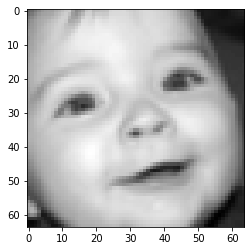

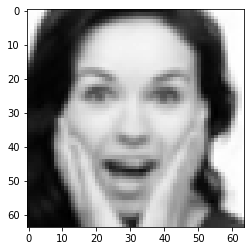

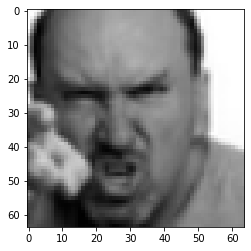

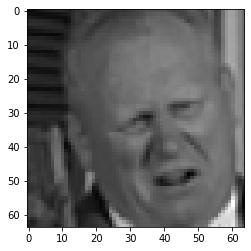

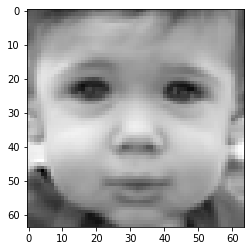

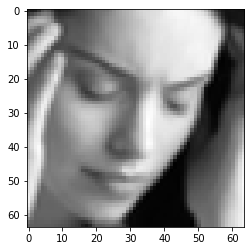

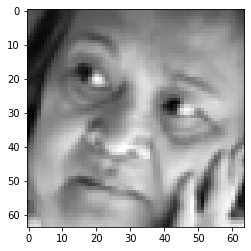

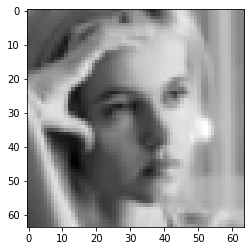

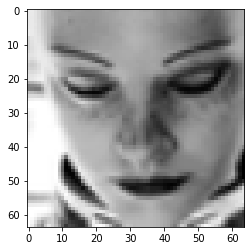

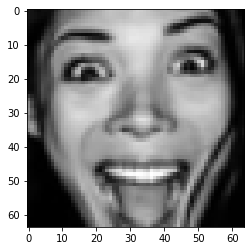

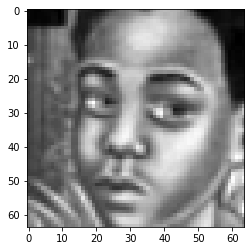

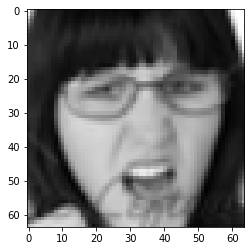

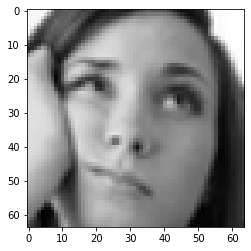

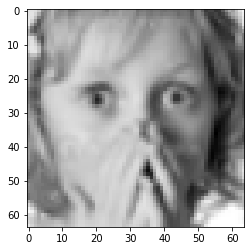

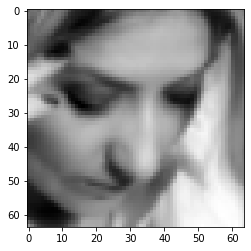

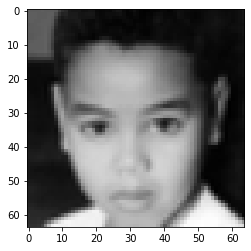

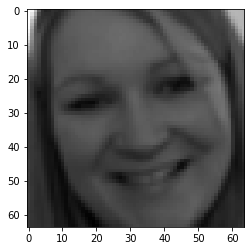

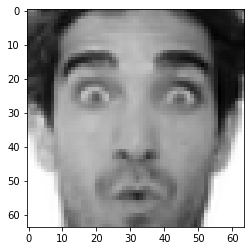

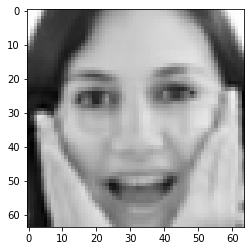

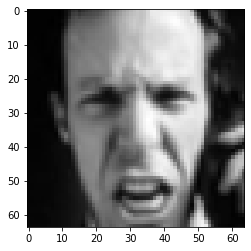

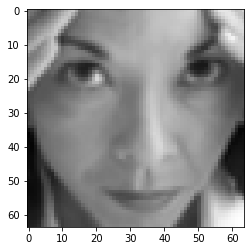

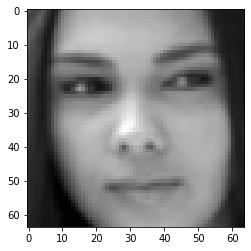

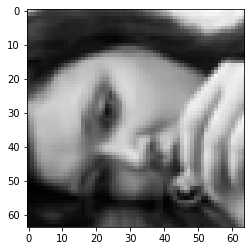

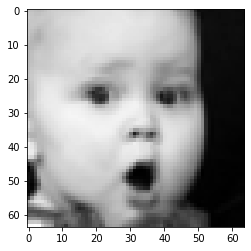

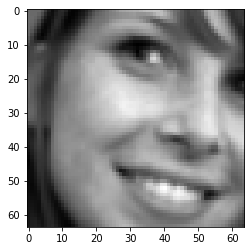

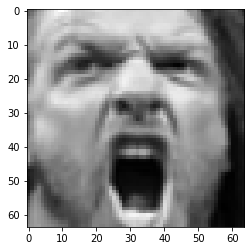

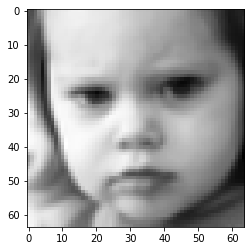

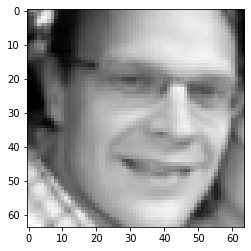

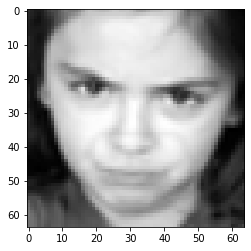

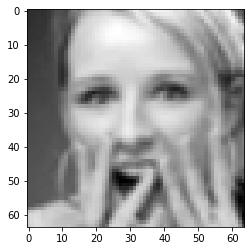

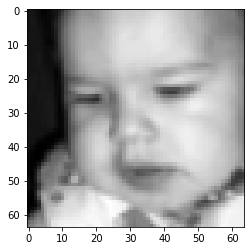

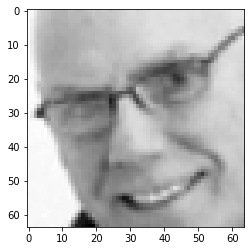

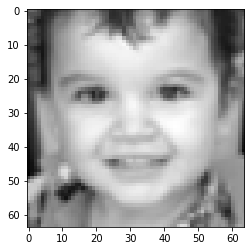

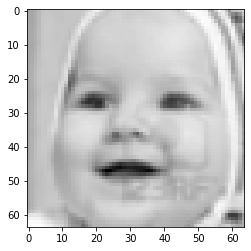

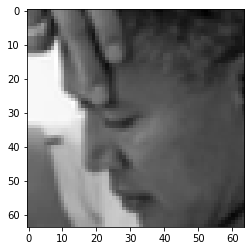

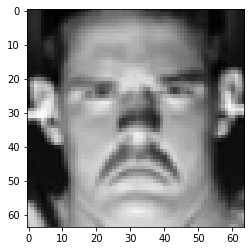

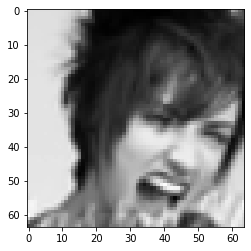

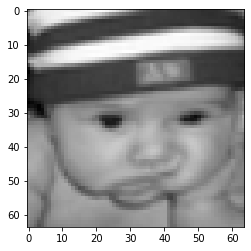

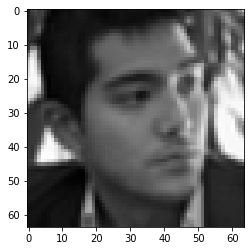

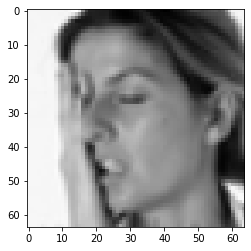

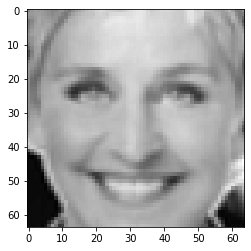

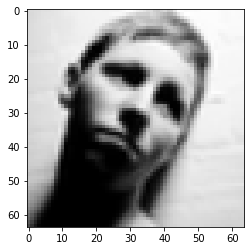

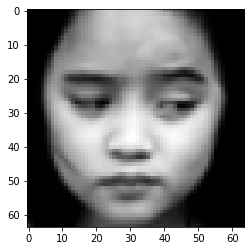

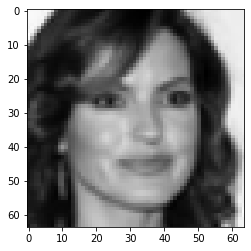

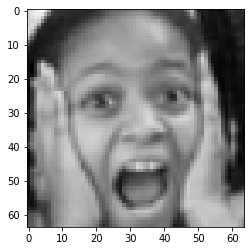

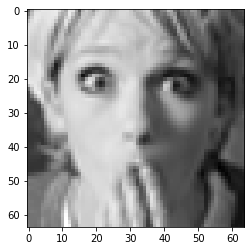

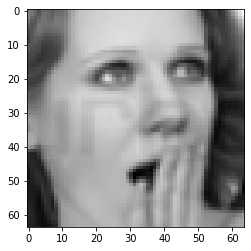

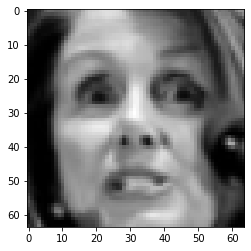

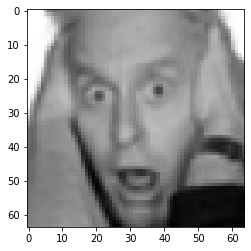

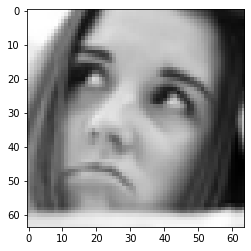

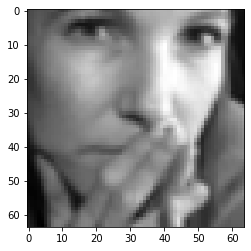

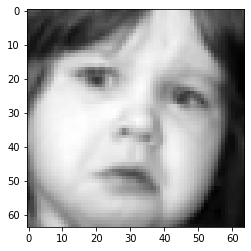

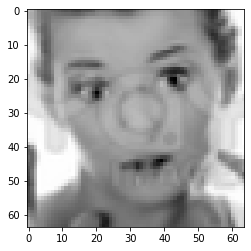

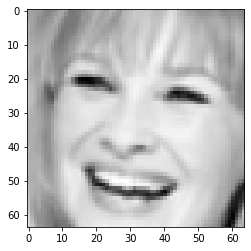

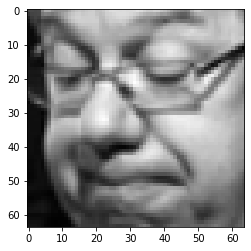

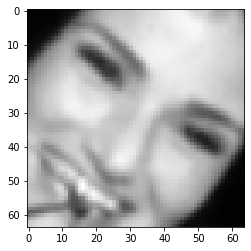

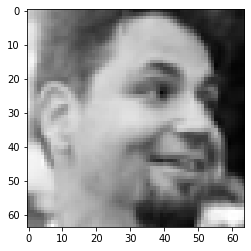

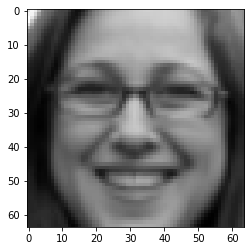

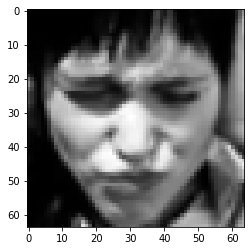

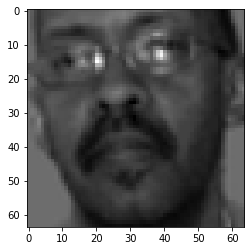

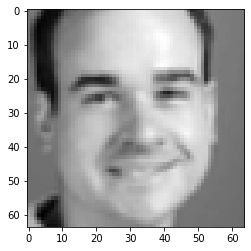

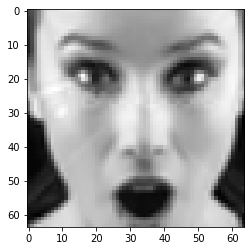

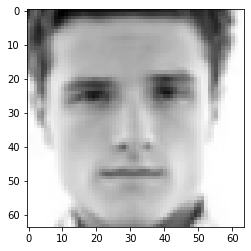

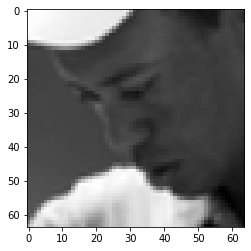

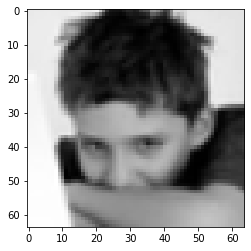

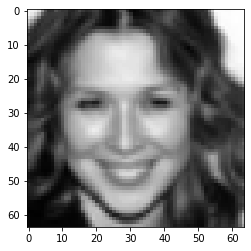

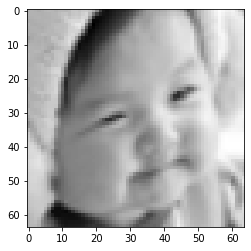

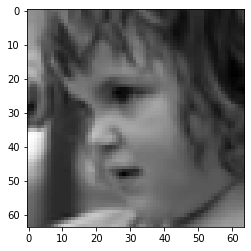

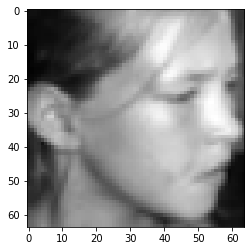

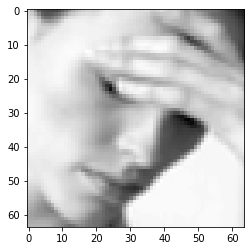

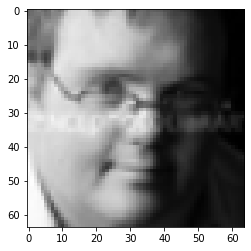

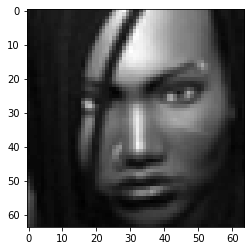

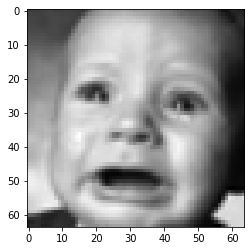

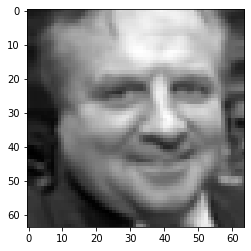

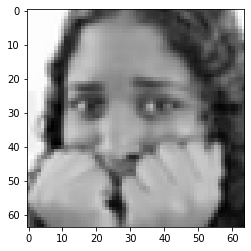

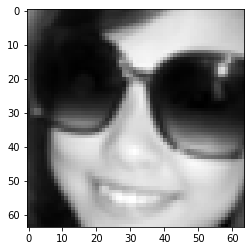

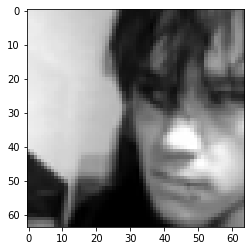

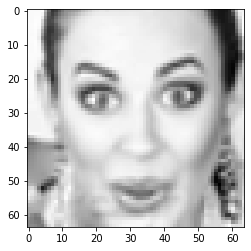

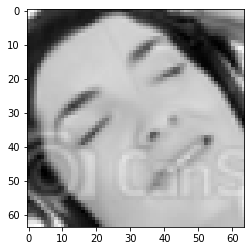

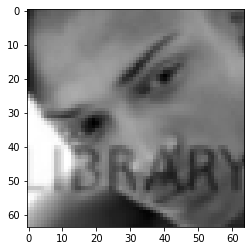

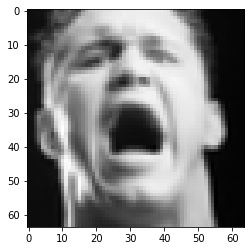

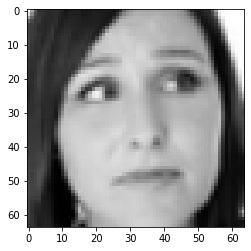

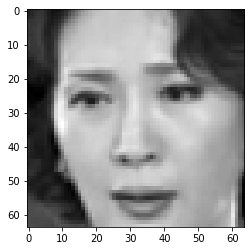

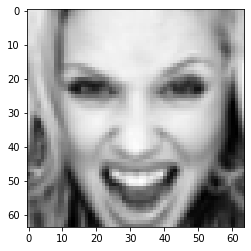

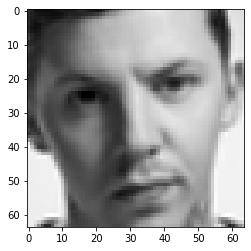

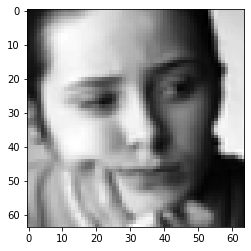

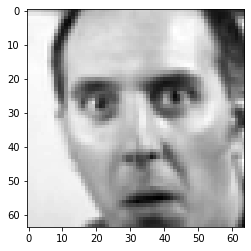

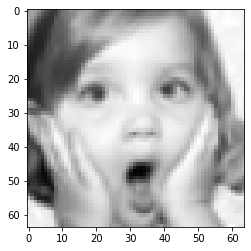

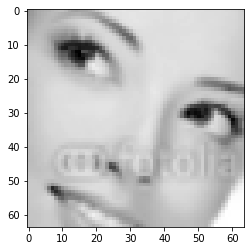

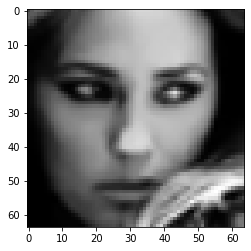

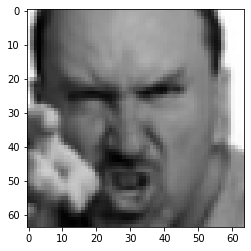

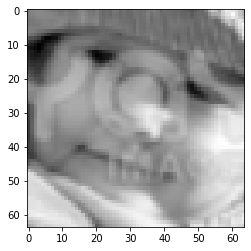

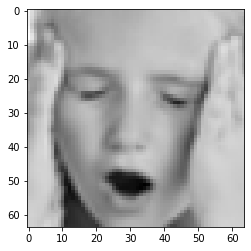

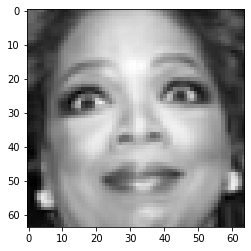

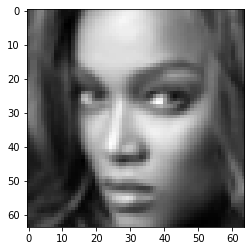

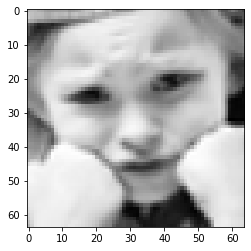

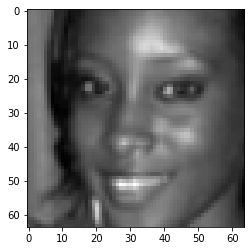

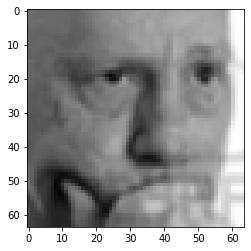

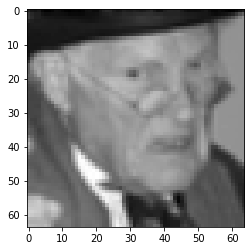

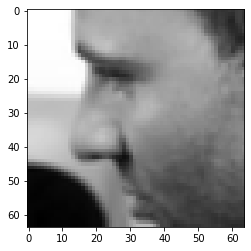

In [51]:
i = 0
while i < 100:
  face = ds_train_faces[i]
  plt.imshow(np.squeeze(face), 'gray')
  plt.show()
  i += 1